<a href="https://colab.research.google.com/github/kiakass/machine-learning/blob/main/AML_Assignment_1_Calculation_addbasisfunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MLE, MAP, Bayesian

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp, scipy.stats
import pandas as pd
np.set_printoptions(linewidth=100)  # line 길이를 늘임

class Bayes():

  def __init__(self,):
      """
      :param commonly
      
      :param mean: mean = 0 given in advane
      :param beta: beta = 11.1 given in advane, equal to 1/(square of sigma)
      :param beta: num = number of input x
      :param learning_rate: alpha on weight update
      """
  def Generate_input_x(self, x, M):
      '''
      : convert x to polynomial value & create matrix
      '''
      return np.matrix([X**i for i in range(M+1)])

  def Generate_target_t(self, x,m,beta,num):
      '''
      : generate target t 
      '''
      np.random.seed(1234)
      epsilon = sp.stats.norm(m,beta**-1).rvs(num)
      return np.sin(2*np.pi*x) + epsilon

  def Calculate_w(self, phi_x, degree, T, alpha=None,est=None):
      '''
      : MLE : w = (x.T*x)^-1 * x.T * t :  w value
      : MAP : w = (x.T*x + alpha*I)^-1 * x.T * t :  w value
      '''
      A = np.dot(phi_x, phi_x.T)
      B = np.dot(phi_x,np.array(T).reshape(num,-1))

      if est == "MAP":
        A += alpha*np.identity(degree+1)
      
      return np.dot(np.linalg.inv(A),B).reshape(degree+1,-1)

  def Calculate_fully_bayes(self, phi_x,T,degree, alpha, beta):
      '''
      : fully bayesian calculate
      : p(t|x,w,alpha,beta) = N(t|m(x),var)
      '''
      # 공분산
      S_1 = alpha*np.identity(degree+1) + beta*np.dot(phi_x,phi_x.T)
      # 평균
      m_x = beta*np.dot(np.dot(phi_x.T,np.linalg.inv(S_1)),np.dot(phi_x,T.reshape(num,-1)))
      mu = np.squeeze(m_x.tolist())  # matrix를 list로 만들고 차원을 1차원으로 낮추기
      # 분산
      s_x = 1/beta + np.dot(np.dot(phi_x.T,np.linalg.inv(S_1)),phi_x)
      var = np.diag(s_x) # iid 가정이므로 diagonal 값만 뽑아내야됨, 
      FB_predict = [ np.random.normal(i,j) for i,j in zip(mu, var) ]

      return FB_predict, mu, var

  def predict(self, w,x):
      return np.squeeze(np.dot(w.T,x).tolist()) # convert 1-dimension

  def make_plot(self, X,Y,type,label,degree=None,N=None,M=None,k=None):
      if N==None :
        plt.plot(X,Y,type,label=label)      
        plt.legend()
      else :
        ax = fig.add_subplot(N, M, k)
        ax.plot(X,Y,type,label=label+' M'+str(degree))      
        ax.legend()

  def make_plot_fill(self, X,up,down,label=None):
      plt.fill_between(X,up,down,facecolor='yellow',alpha=0.2,label=label,color='pink' ) #,color='pink'     
      plt.legend()

  def loss_abs(self, y, ypred):
    return sum(abs(y - ypred))


def phi_poly(degree,X):
    #Polynomial functions
    #Return assembled design matrix phi
    N,k = X.shape 
    phi = np.ones((N, degree * k + 1))
    for i in range(N):
        for j in range(degree):
            phi[i,j*k:(j+1)*k] = X[i, :]**(j+1)
            '''
            if i % 1000 == 0 :
              print(i,j*k,(j+1)*k,phi[i,j*k:(j+1)*k].shape)
            '''
    return phi




           MLE        MAP
w0   -0.021491  -0.001711
w1    6.183572   4.040878
w2    0.943253   0.117639
w3  -39.910660 -18.738964
w4   -6.197035  -0.350423
w5   73.540813  13.894664
w6   15.228366   0.259158
w7  -55.620831   8.461257
w8  -15.811600   0.152266
w9   15.786838  -7.544975
w10   5.843009  -0.197386


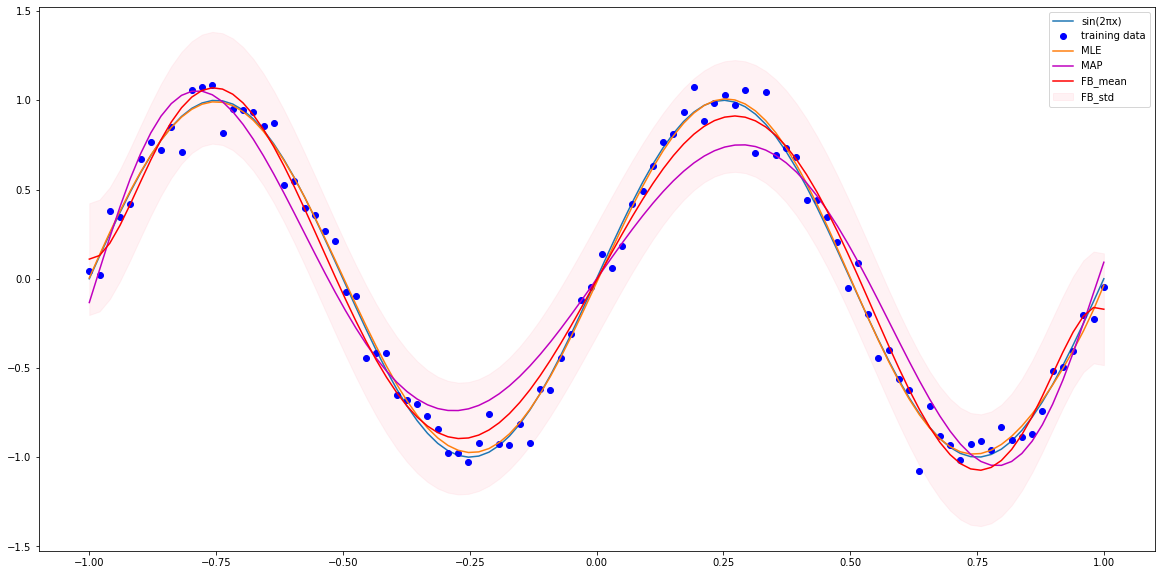

In [135]:
if __name__ == "__main__":

  # init value
  mean = 0
  beta = 11.1
  alpha = 5*10**(-3) #learning rate is indicated in advance 

  num = 100  # number of input x
  M = 10      # polynomial order

  X = np.linspace(-1,1,num)
  Y = np.sin(2*np.pi*X)

  MLE = Bayes()
  T = MLE.Generate_target_t(X,mean,beta,num)

  plt.figure(figsize=(20,10))
  MLE.make_plot(X,Y,'-','sin(2πx)')  
  MLE.make_plot(X,T,'bo',"training data")  
  # w for pandas index 
  col = [ 'w'+str(i) for i in range(M+1) ]

  # Φ(x) : polynomial [x**i]
  pi_x = MLE.Generate_input_x(X,M)

  # get MLE
  est='MLE' 
  w_mle=MLE.Calculate_w(pi_x,M,T,alpha,est)
  MLE_prediction = MLE.predict(w_mle,pi_x)
  MLE.make_plot(X,MLE_prediction,'-',est)  

  # get MAP
  est='MAP' 
  w_map=MLE.Calculate_w(pi_x,M,T,alpha,est)
  MAP_prediction = MLE.predict(w_map,pi_x)
  MLE.make_plot(X,MAP_prediction,'m-',est)

  # get FULLY Bayesian : M fiexed
  FB_predict, mu, var = MLE.Calculate_fully_bayes(pi_x,T,M, alpha, beta)

  sigma=np.average(np.sqrt(var))
  std = np.array([ (i+sigma, i-sigma) for i in mu])

  MLE.make_plot(X,mu,'r-',label='FB_mean') 
  MLE.make_plot_fill(X,std[:,0],std[:,1],label='FB_std') 
  #MLE.make_plot(X,FB_predict,'b-',label='predict')

  # compare w between MLE,MAP
  print_w = pd.DataFrame(w_mle, index=col, columns=['MLE'])
  print_w['MAP'] = pd.DataFrame(w_map, index=col, columns=['MAP'])
  print(print_w)


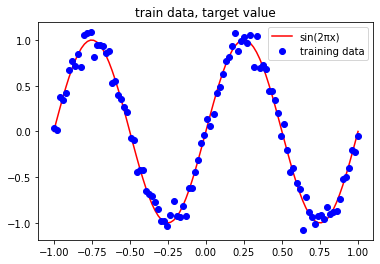

In [126]:
plt.plot(X,Y,'r-',label='sin(2πx)')  
plt.plot(X,T,'bo',label="training data")
plt.title('train data, target value')
plt.legend()

## Basis function - polynomial

In [133]:
# init value
mean = 0
beta = 11.1
alpha = 5*10**(-3) #learning rate is indicated in advance 

num = 100  # number of input x
maxdegree=10   # polynomial order

X = np.linspace(-1,1,num)
Y = np.sin(2*np.pi*X)

MLE = Bayes()
T = MLE.Generate_target_t(X,mean,beta,num)

fig = plt.figure(figsize=(20, 30))
N=maxdegree
M=3

X = np.linspace(-1,1,num)
for degree in range(1,maxdegree+1):

    
    X=X.reshape(-1,1)
    # Φ(x) : polynomial [x**i]
    phi = phi_poly(degree,np.array(X))
    #print('M :',degree ,'phi :',phi.shape)
    
    # get MLE
    est='MLE' 
    w_mle=MLE.Calculate_w(phi.T,degree,T,alpha,est)
    #print(w_mle)
    k=3*degree - 2
    MLE_prediction = MLE.predict(w_mle,phi.T)
    #MLE.make_plot(X,MLE_prediction,'-',est,degree,N,M,k)  
    print("MLE degree #%d ; loss = %.5f" % (degree, MLE.loss_abs(MLE_prediction,T)))

    # get MAP
    est='MAP' 
    w_map=MLE.Calculate_w(phi.T,degree,T,alpha,est)
    MAP_prediction = MLE.predict(w_map,phi.T)
    k=3*degree - 1
    #MLE.make_plot(X,MAP_prediction,'-',est,degree,N,M,k)
    print(est,'degree #%d ; loss = %.5f' % (degree, MLE.loss_abs(MAP_prediction,T)))

    # get FULLY Bayesian : M fiexed
    est='FB'
    FB_prediction, mu, var = MLE.Calculate_fully_bayes(phi.T, T, degree, alpha, beta)

    sigma=np.average(np.sqrt(var))
    std = np.array([ (i+sigma, i-sigma) for i in mu])
    #print(std)
    k=3*degree
    #MLE.make_plot(X,mu,'-',est,degree,N,M,k) 
    #MLE.make_plot_fill(X.reshape(-1),std[:,0],std[:,1],label='FB_std') 
    print(est,'degree #%d  ; loss = %.5f' % (degree, MLE.loss_abs(FB_prediction,T)))


    col = [ 'w'+str(i) for i in range(degree+1) ]
    print_w = pd.DataFrame(w_mle, index=col, columns=['MLE'])
    print_w['MAP'] = pd.DataFrame(w_map, index=col, columns=['MAP'])

print(print_w)

MLE degree #1 ; loss = 55.67766
MAP degree #1 ; loss = 55.67798
FB degree #1  ; loss = 56.63287
MLE degree #2 ; loss = 55.66630
MAP degree #2 ; loss = 55.66664
FB degree #2  ; loss = 55.35831
MLE degree #3 ; loss = 53.71014
MAP degree #3 ; loss = 53.71148
FB degree #3  ; loss = 54.08455
MLE degree #4 ; loss = 53.70912
MAP degree #4 ; loss = 53.71048
FB degree #4  ; loss = 52.87788
MLE degree #5 ; loss = 20.40924
MAP degree #5 ; loss = 20.88710
FB degree #5  ; loss = 22.06982
MLE degree #6 ; loss = 20.41311
MAP degree #6 ; loss = 20.89332
FB degree #6  ; loss = 20.37895
MLE degree #7 ; loss = 7.63756
MAP degree #7 ; loss = 19.36053
FB degree #7  ; loss = 12.53291
MLE degree #8 ; loss = 7.63081
MAP degree #8 ; loss = 19.35945
FB degree #8  ; loss = 10.20295
MLE degree #9 ; loss = 6.72633
MAP degree #9 ; loss = 14.85091
FB degree #9  ; loss = 11.66998
MLE degree #10 ; loss = 6.72389
MAP degree #10 ; loss = 14.85118
FB degree #10  ; loss = 12.17240
           MLE        MAP
w0    6.183572 

<Figure size 1440x2160 with 0 Axes>